In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Connection to DB

In [2]:
con = sqlite3.connect('communes.db')

# SQLs

In [3]:
comptes_test = pd.read_sql_query("SELECT * FROM COMPTES", con)

In [4]:
comptes_test

,COMPTE,LIBELLE
0,1,Comptes de capitaux
1,2,Comptes d'immobilisations
2,3,Comptes de stocks et en cours
3,4,Comptes de tiers
4,5,Comptes financiers
5,6,Comptes de charges
6,7,Comptes de produits
7,8,Comptes spéciaux
8,10,Dotations fonds divers et réserves
9,11,Report à nouveau - solde créditeur ou débiteur


In [5]:
balances_test = pd.read_sql_query("SELECT EXER,LBUDG,SUM(SD),SUM(SC) FROM BALANCES WHERE NOMEN='M14' \
                                   and CAST(COMPTE as TEXT) like '10%'\
                                   GROUP BY EXER,LBUDG", con)

In [6]:
balances_test['TOT'] = balances_test['SUM(SC)'] - balances_test['SUM(SD)']

In [7]:
balances_test[balances_test['TOT'] == balances_test['TOT'].max()]

,EXER,LBUDG,SUM(SD),SUM(SC),TOT
18011,2018,MARSEILLE,34942448.27,3.522810e+09,3.487868e+09


In [8]:
balances_test[balances_test['TOT'] == balances_test['TOT'].min()]

,EXER,LBUDG,SUM(SD),SUM(SC),TOT
16989,2018,LOTS COMMUNAUX SOTTEVAST (ENTREPRISES),92808.0,0.0,-92808.0


(array([12946.,  6259.,  3320.,  1936.,  1334.,   979.,   700.,   593.,
          486.,   383.,   310.,   277.,   251.,   209.,   180.,   165.,
          144.,   118.,   123.,    98.,    93.,    82.,    83.,    73.,
           75.,    51.,    58.,    47.,    53.,    42.,    41.,    41.,
           36.,    26.,    34.,    33.,    23.,    31.,    22.,    23.,
           20.,    16.,    23.,    27.,    21.,    16.,    14.,    16.,
           17.]),
 array([       0,  2000000,  4000000,  6000000,  8000000, 10000000,
        12000000, 14000000, 16000000, 18000000, 20000000, 22000000,
        24000000, 26000000, 28000000, 30000000, 32000000, 34000000,
        36000000, 38000000, 40000000, 42000000, 44000000, 46000000,
        48000000, 50000000, 52000000, 54000000, 56000000, 58000000,
        60000000, 62000000, 64000000, 66000000, 68000000, 70000000,
        72000000, 74000000, 76000000, 78000000, 80000000, 82000000,
        84000000, 86000000, 88000000, 90000000, 92000000, 94000000,
      

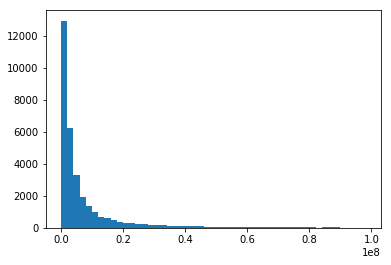

In [9]:
plt.hist(balances_test['TOT'],bins=[i for i in range(0,100000000,2000000)])

## 2 digits accounts

In [61]:
df = pd.read_sql_query("SELECT EXER,LBUDG,SUBSTR(COMPTE,1,2) as COMPTE,SUM(SC) - SUM(SD) AS TOT FROM BALANCES WHERE NOMEN='M14' \
                                   GROUP BY EXER,LBUDG,COMPTE", con)

In [62]:
df.head()

,EXER,LBUDG,COMPTE,TOT
0,2018,13 LOGTS SOCIAUX CENTRE - BAVANS,12,0.00
1,2018,13 LOGTS SOCIAUX CENTRE - BAVANS,11,4420.44
2,2018,13 LOGTS SOCIAUX CENTRE - BAVANS,16,4327.87
3,2018,13 LOGTS SOCIAUX CENTRE - BAVANS,44,0.00
4,2018,13 LOGTS SOCIAUX CENTRE - BAVANS,46,0.00


In [63]:
df.dtypes

EXER       object
LBUDG      object
COMPTE     object
TOT       float64
dtype: object

In [64]:
comptes_test.dtypes

COMPTE      int64
LIBELLE    object
dtype: object

In [65]:
df['COMPTE'] = df['COMPTE'].astype(int)

In [66]:
df.dtypes

EXER       object
LBUDG      object
COMPTE      int64
TOT       float64
dtype: object

In [67]:
df = pd.merge(df, comptes_test)

In [68]:
df = df.pivot_table(values='TOT', index='LBUDG', columns='LIBELLE', aggfunc=np.sum).reset_index()

In [69]:
for col in df.columns:
    print(col, sum(df[col].isna())/df.shape[0])

LBUDG 0.0
Achats et variation des stocks 0.13819407486251553
Amortissements des immobilisations 0.415443878456119
Autres approvisionnements - fournitures consommables 0.9970602397425176
Autres charges de gestion courante 0.21706074659773436
Autres immobilisations financières 0.4442585975316151
Autres produits de gestion courante 0.19288375275602523
Autres services extérieurs 0.20238728807116246
Avances de trésorerie versées 0.99376568083327
Charges de personnel 0.27818748574469704
Charges exceptionnelles 0.5137737905167389
Charges financières 0.2593831572011455
Comptabilité distincte rattachée 0.19412554803720317
Compte de liaison : affectation (budgets annexes) 0.6896272079880382
Comptes de régularisation 0.9582097873742366
Comptes transitoires ou d attente 0.04526217086089358
Dotations aux Amortissements et aux provisions 0.48835500139385185
Dotations et participations 0.2489672824957551
Dotations fonds divers et réserves 0.17529587673281127
Débiteurs et créditeurs divers 0.152892876

In [70]:
df = df[df['Dotations fonds divers et réserves'].isna() == False]
df_no_funds = df[df['Dotations fonds divers et réserves'].isna() == True]

In [71]:
df = df.fillna(0)

In [72]:
for col in list(df.columns.drop('LBUDG','Dotations fonds divers et réserves')):
    df['%s / Dotations fonds divers et réserves ratio' % col] = df[col] / df['Dotations fonds divers et réserves']

In [76]:
df = df.filter(like='ratio')

In [82]:
for col in df:
    if len(list(df[col].unique())) <= 100:
        df.drop(columns=[col], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [84]:
for col in df:
    print(col, len(list(df[col].unique())))

Neutralisations et régularisations d'opérations 28180
Achats et variation des stocks / Dotations fonds divers et réserves ratio 30109
Amortissements des immobilisations / Dotations fonds divers et réserves ratio 21838
Autres approvisionnements - fournitures consommables / Dotations fonds divers et réserves ratio 112
Autres charges de gestion courante / Dotations fonds divers et réserves ratio 29616
Autres immobilisations financières / Dotations fonds divers et réserves ratio 21687
Autres produits de gestion courante / Dotations fonds divers et réserves ratio 30366
Autres services extérieurs / Dotations fonds divers et réserves ratio 30382
Avances de trésorerie versées / Dotations fonds divers et réserves ratio 180
Charges de personnel / Dotations fonds divers et réserves ratio 28252
Charges exceptionnelles / Dotations fonds divers et réserves ratio 18882
Charges financières / Dotations fonds divers et réserves ratio 27515
Comptabilité distincte rattachée / Dotations fonds divers et rés

# Model - Clustering